# Imports and setup

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# Reading data

In [3]:
tbl = pd.read_excel("Social data.xlsx")

In [4]:
tbl.columns

Index(['hashed_id', 'hashed_login', 'is_group_X', 'is_student',
       'liked_count_own', 'liked_count_other', 'image_count',
       'num_comments_own', 'post_count', 'num_comments_other'],
      dtype='object')

In [5]:
like_in = "liked_count_other"
like_out = "liked_count_own"

The cell below filters data points that belong to super-active users

In [6]:
sel = (tbl[like_in] <= 1000) & (tbl[like_out] <= 1000)
tbl = tbl.loc[sel]

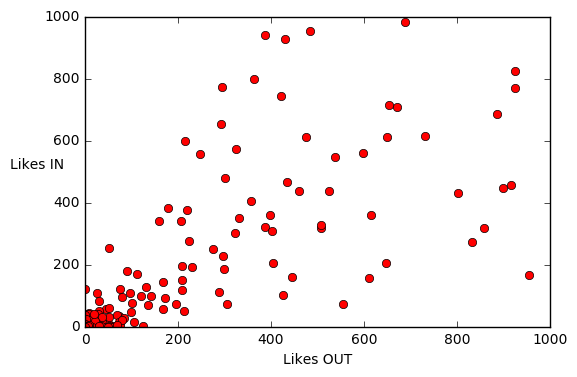

In [7]:
fig, ax = plt.subplots()
ax.plot(tbl[like_out], tbl[like_in], "o", color="red")
ax.set_xlabel("Likes OUT")
ax.set_ylabel("Likes IN", rotation=0)

As you can see from the graph above, the points distribution is skewed - the are many points in the low region and few points in the high region. By transforming the data to the logarithmic scale, we casue a more uniform distribution

In [8]:
tbl['like_in_log'] = np.log10(tbl[like_in] + 1) # adding 1 to prevent log(0)
tbl['like_out_log'] = np.log10(tbl[like_out] + 1)

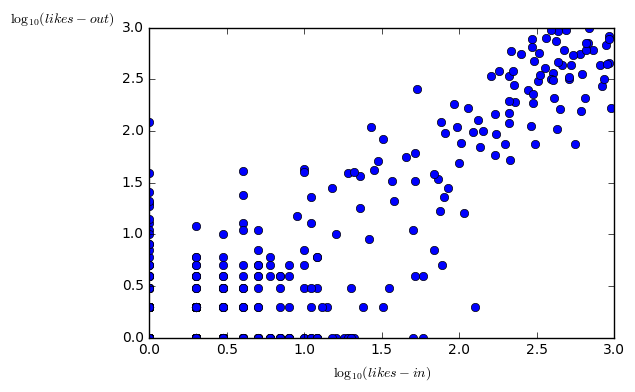

In [9]:
fig, ax = plt.subplots()
ax.plot(tbl.like_out_log, tbl.like_in_log, 'o')
ax.set_xlabel("$\\log_{10}(likes-in)$")
ax.set_ylabel("$\\log_{10}(likes-out)$", rotation=0, y=1, ha="right")

# Bulding a model
We will build a simplistic model that connects between the # of likes a person gives to the number of likes a person receives.

In [10]:
parameters = np.polyfit(tbl.like_out_log, tbl.like_in_log, 1)
x_prediction = [0, 3]
y_prediction = np.polyval(parameters, x_prediction)

In [11]:
parameters

array([  8.42655176e-01,  -1.79650400e-04])

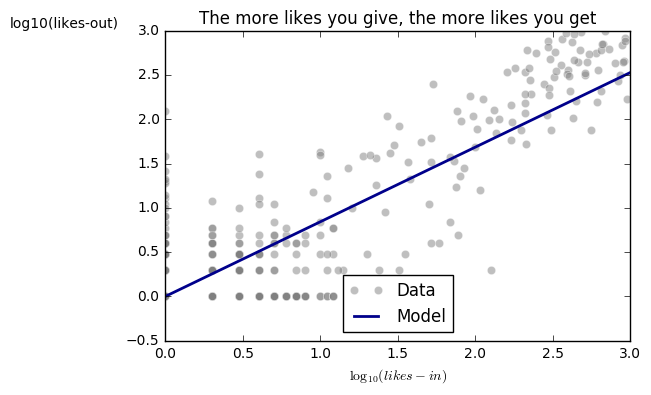

In [12]:
fig, ax = plt.subplots()

ax.plot(tbl.like_out_log, 
        tbl.like_in_log, 
        'o', 
        alpha=0.5,  
        markersize=6, 
        mec="white", 
        mfc="gray", 
        label="Data"
       )

ax.plot(x_prediction, 
        y_prediction, 
        '-', lw=2, 
        color="darkblue",
        label="Model"
       )
ax.set_xlabel("$\\log_{10}(likes-in)$")
ax.set_ylabel("log10(likes-out)", rotation=0, y=1, ha="right")
ax.legend(loc=8)
ax.set_title("The more likes you give, the more likes you get")

The variable `parameters` defines the model. To predict how many likes a user will receive, given the number of likes he or she gave, we do the following:


In [13]:
log_likes_in_predicted = np.polyval(parameters, tbl.like_out_log)

Congratulations, the `log_likes_in_predicted` variable contains the model prediction. For the convinience, let's store the observed values in a separate variable

In [14]:
log_likes_in_observed = tbl.like_in_log.values

We will also need to analyze model residuals. A residual is the difference between the observation and the prediction

In [15]:
residuals = log_likes_in_predicted - log_likes_in_observed

# The exercise


## Description
Using the best practices that were mentioned during the lecture, generate a figure that consists of two sub-plot. One subplot should compare the observed and the predicted values of `log_likes_in`. Another subplot should visualize the residuals. Make sure to address the following points:
 * Should the two subplots be placed one **above** another or one **besides** another? Why?
 * Consider subplot arangement such that the residual plot occupies around $\frac{2}{3}$ of the total figure area
 * Remove the box around the subplots
 
Since you study in the Azrieli College, use the color from its logo to represent the points. The HEX color value is "#e92431".


Once you're happy, right-click on the image, select "Save image as..." and save the file. Next, create a presentation slide with that image, makign sure to write a descriptive title. 



## What to submit?

 * PDF file with the slide
 * A description of what decisions you made during the preparation. What made you choosing option A and not option B, What emphasis you made when deciding about an element X, etc. 
 
## What to do if I'm stuck?

Go throught the demo notebooks that you got during the previous lesson. Among others, they contain links to extensive documentation. For inspiration, you may also look at the [Matplotlib gallery][1] or a collection of [recipes][2]

[1]: http://matplotlib.org/gallery.html
[2]: http://matplotlib.org/users/recipes.html

In [16]:
selected = tbl.is_group_X.values

C:\Users\Mali\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  app.launch_new_instance()


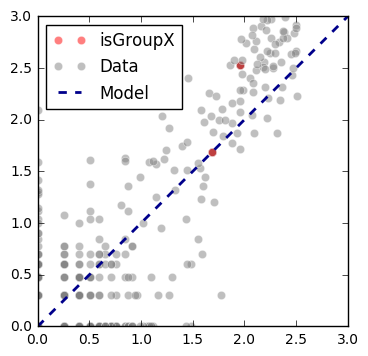

In [17]:
fig, ax = plt.subplots()

ax.plot(log_likes_in_predicted[sel],log_likes_in_observed[sel], 
        'o', 
        alpha=0.5,  
        markersize=6, 
        mec="white", 
        mfc="red", 
        label="isGroupX"
       )

ax.plot(log_likes_in_predicted,log_likes_in_observed, 
        'o', 
        alpha=0.5,  
        markersize=6, 
        mec="white", 
        mfc="gray", 
        label="Data"
       )
ax.plot([0,3],[0,3],
        '--', lw=2, 
        color="darkblue",
        label="Model"
       )
ax.set_xlim(0,3)
ax.set_aspect(1.0)
ax.legend(loc="best")

In [18]:
residuals

array([ -5.06537894e-03,  -5.80877690e-01,  -2.06422100e-01, ...,
        -3.01209646e-01,   1.09886596e-01,  -1.79650400e-04])

(-1.5, 1.5)

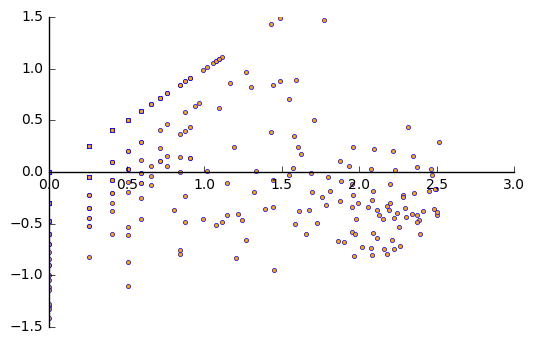

In [19]:
fig , ax = plt.subplots()
ax.plot(log_likes_in_predicted,residuals,'.',mfc='orange')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.set_xlim(0,3)
ax.set_ylim(-1.5,1.5)


In [20]:
import matplotlib

In [21]:
parameters = np.polyfit(log_likes_in_predicted, (residuals), 15)
x_prediction = np.arange(0, 2.5, 0.01)
y_prediction = np.polyval(parameters, x_prediction)

In [22]:
parameters

array([ -1.74681283e+02,   3.59920343e+03,  -3.36828962e+04,
         1.89430856e+05,  -7.13849047e+05,   1.90264881e+06,
        -3.69001587e+06,   5.27597117e+06,  -5.57220647e+06,
         4.31212312e+06,  -2.39838238e+06,   9.26070863e+05,
        -2.33633086e+05,   3.42964941e+04,  -2.19513296e+03,
        -4.05812791e-01])

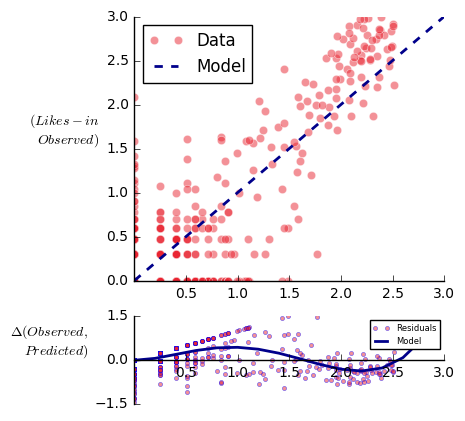

In [39]:

fig = plt.figure(figsize = (4,5))
                 
gs = matplotlib.gridspec.GridSpec(nrows=2,ncols=1,height_ratios=(3,1))
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

ax1.plot(log_likes_in_predicted,log_likes_in_observed, 
        'o', 
        alpha=0.5,  
        markersize=6, 
        mec="white", 
        mfc="#e92431", 
        label="Data"
       )
ax1.plot([0,3],[0,3],
        '--', lw=2, 
        color="darkblue",
        label="Model"
       )
ax1.set_xlim(0,3)
ax1.legend(loc="best")
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.set_ticks_position("left")
ax1.xaxis.set_ticks_position("bottom")

ax2.plot(log_likes_in_predicted,
         residuals,
         '.',
         alpha = 0.5,
         mfc='#e92431',
        label = 'Residuals')
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_ticks_position("left")
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.label.set_visible(False)
ax2.set_xlim(0,3)
ax2.set_ylim(-1.5,1.5)
ax2.plot(x_prediction, 
        y_prediction, 
        '-', lw=2, 
        color="darkblue",
        label="Model"
       )
ax2.legend(loc="best",prop={'size':6})

ax1.set_ylabel("$(Likes-in$\n$Observed)$", rotation=0,  ha="right")

ax2.set_ylabel("$\Delta (Observed,$\n$Predicted) $", rotation=0,  ha="right")
ax2.set_xlabel("$\\log_{10}(likes-in)$")
ax2.set_yticks([-1.5,0,1.5])
ax2.set_xticks([0.5,1,1.5,2,2.5,3])
ax1.set_xticks([0.5,1,1.5,2,2.5,3])
ax1.set_yticks([0,0.5,1,1.5,2,2.5,3])

In [24]:
residuals

array([ -5.06537894e-03,  -5.80877690e-01,  -2.06422100e-01, ...,
        -3.01209646e-01,   1.09886596e-01,  -1.79650400e-04])

In [25]:
ttt = log_likes_in_predicted, residuals

In [26]:
ttt = np.array(ttt)

In [27]:
ttt.data.strides

(39712, 8)

In [28]:
ttt = np.column_stack((log_likes_in_predicted, residuals))

In [29]:
ttt

array([[  1.68513070e+00,  -5.06537894e-03],
       [  1.95314842e+00,  -5.80877690e-01],
       [  2.34988040e+00,  -2.06422100e-01],
       ..., 
       [ -1.79650400e-04,  -3.01209646e-01],
       [  7.11946587e-01,   1.09886596e-01],
       [ -1.79650400e-04,  -1.79650400e-04]])

In [30]:
sss = ttt.sort(axis=0)

In [31]:
sss

In [32]:
hist = np.histogramdd(ttt)

In [33]:
hist

(array([[  1.00000000e+00,   2.00000000e+00,   7.00000000e+00,
           2.40000000e+01,   7.80000000e+01,   4.43900000e+03,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.93000000e+02,
           4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           6.80000000e+01,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           3.10000000e+01,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
      

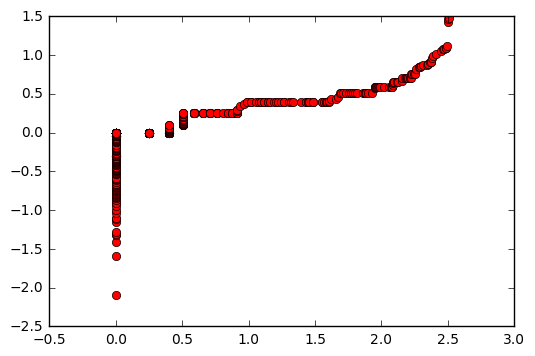

In [34]:
plt.plot(ttt[:,0], ttt[:,1], 'ro')

In [35]:
parameters = np.polyfit(log_likes_in_predicted, residuals, 5)
x_prediction = np.arange(0, 3, 0.2)
y_prediction = np.polyval(parameters, x_prediction)

In [36]:
parameters

array([-0.038788  ,  0.63102749, -2.13353098,  1.97235732,  0.01009736,
       -0.01043986])

In [37]:
y_prediction

array([-0.01043986,  0.05440289,  0.18838739,  0.32358951,  0.41333766,
        0.43072333,  0.36711162,  0.2306518 ,  0.04478783, -0.15323108,
       -0.31383994, -0.37664746, -0.27192545,  0.07790166,  0.75676738])